# SP via class imbalance

Example [test scores](https://www.brookings.edu/blog/social-mobility-memos/2015/07/29/when-average-isnt-good-enough-simpsons-paradox-in-education-and-earnings/)

SImpson's paradox can also occur due to a class imbalance, where for example, over time the value of several differnt subgroups all increase, but the totla average decreases over tme.   This is also am mportant tpe to catch because this can inicate a large class disparity beased on the subgrouping variable.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [51]:
t = np.linspace(0,50,11)
count_rate = np.asarray([1,1.5,1.4])
count_pow = np.asarray([1,1.4, 1.3])
count_0 = np.asarray([100,60,40])
count = np.asarray([count_0 + count_rate*(t_i**count_pow) for t_i in t])
share = count/np.asarray([np.sum(count, axis=1)]*3).T
score_rate = np.asarray([.1, .112, .15])
score_0 = [310,290,280]
scores = np.asarray([score_0 + score_rate*t_i for t_i in t])
total_score = np.sum(scores*share,axis=1)


In [52]:
total_score

array([298.        , 297.45443985, 296.68317666, 296.10797527,
       295.75884352, 295.60140953, 295.59491821, 295.70503918,
       295.90526496, 296.17565064, 296.50124668])

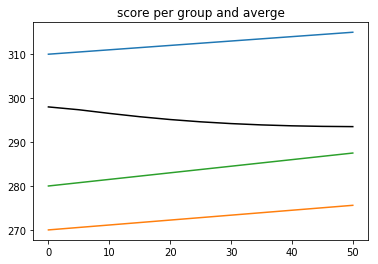

In [70]:
plt.plot(t,scores)
plt.plot(t,total_score,'k', label ='average')
plt.title('score per group and averge');

Next, to make this a more general.

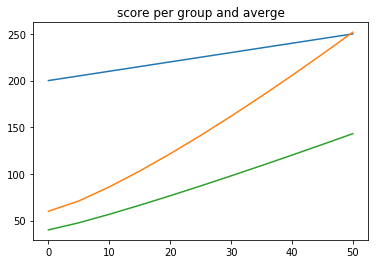

In [71]:
plt.plot(t,count)
plt.title('score per group and averge');

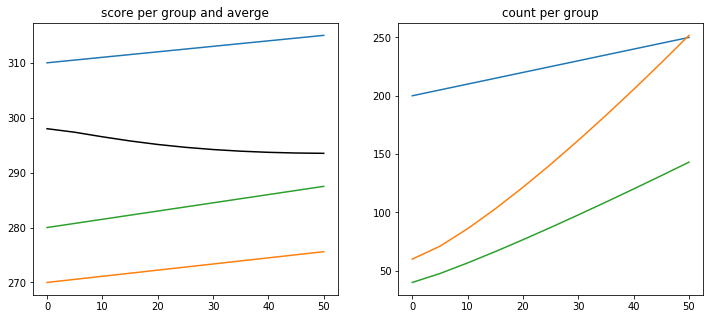

In [72]:
t = np.linspace(0,50,11)
count_rate = np.asarray([1,1.5,1.24])
count_pow = np.asarray([1,1.24, 1.13])
count_0 = np.asarray([200,60,40])
count = np.asarray([count_0 + count_rate*(t_i**count_pow) for t_i in t])
share = count/np.asarray([np.sum(count, axis=1)]*3).T
score_rate = np.asarray([.1, .112, .15])
score_0 = [310,270,280]
scores = np.asarray([score_0 + score_rate*t_i for t_i in t])
total_score = np.sum(scores*share,axis=1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t,scores)
plt.plot(t,total_score,'k', label ='average')
plt.title('score per group and averge');

plt.subplot(1,2,2)
plt.plot(t,count)
plt.title('count per group');

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  Base class for subplots, which are :class:`Axes` instances with
 |  additional methods to facilitate generating and manipulating a set
 |  of :class:`Axes` within a figure.
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods inherited from SubplotBase:
 |  
 |  __init__(self, fig, *args, **kwargs)
 |      *fig* is a :class:`matplotlib.figure.Figure` instance.
 |      
 |      *args* is the tuple (*numRows*, *numCols*, *plotNum*), where
 |      the array of subplots in the figure has dimensions *numRows*,
 |      *numCols*, and where *plotNum* is the number of the subplot
 |      being created.  *plotNum* starts at 1 in the upper left
 |      corner and increases to the right.
 |      
 |     

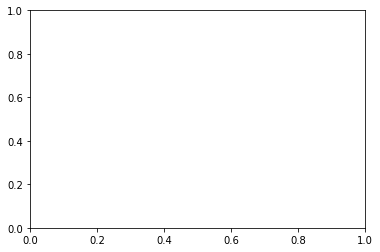

In [59]:
help(plt.subplot())